### Multivariate Regression

In most of the real life use cases there will be more than one independent variable, so the concept of having multiple independent variables is called as multivariate regression. The equation take the below form.

$y = m_1 x_1 + m_2 x_2 + m_3 x_3 + . . .+ m_n x_n$
Where, each independent variable is represented by x’s, and m’s are the corresponding coefficients.


**Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Importing dataset**

Housing_Modified.csv

Eg : dataset = pd.read_csv('C:/Users/srikanth/Desktop/MLInternship/Batch1/day4/datasets/Grade_Set_1.csv')

In [12]:
dataset = pd.read_csv('./datasets/Housing_Modified.csv') # Comma seperated values
dataset.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,one,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,one,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,two,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,one,yes,no,no,no,no,0,no


## Housing data

We'll be using the housing data from the Rdatasets from https://vincentarelbundock.github.io/Rdatasets/

The housing data contains sales prices of houses in the city of Windsor. Below is the brief description about each variables.
- price: sale price of a house
- lotsize: the lot size of a property in square feet
- bedrooms: number of bedrooms
- bathrms: number of full bathrooms
- stories: number of stories excluding basement
- driveway: does the house has a driveway ?
- recroom: does the house has a recreational room ?
- fullbase: does the house has a full finished basement ?
- gashw: does the house uses gas for hot water heating ?
- airco: does the house has central air conditioning ?
- garagepl: number of garage places
- prefarea: is the house located in the preferred neighbourhood of the city ?

**Step -1 : See the info about the dataset**

In [13]:
print(dataset.keys())
print(dataset.info())

Index(['price', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway',
       'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
price       546 non-null float64
lotsize     546 non-null int64
bedrooms    546 non-null int64
bathrms     546 non-null int64
stories     546 non-null object
driveway    546 non-null object
recroom     546 non-null object
fullbase    546 non-null object
gashw       546 non-null object
airco       546 non-null object
garagepl    546 non-null int64
prefarea    546 non-null object
dtypes: float64(1), int64(4), object(7)
memory usage: 51.3+ KB
None


# Data Preprocessing

**If you find missing values either remove or replace missing values**

In [14]:
# dataset = dataset.dropna()
# dataset.head()

### Data preprocessing

Let's build a model to predict the house price (dependent variable), considering rest of the variables as independent variables

Handling categorical variables
- Label Binarizer: This will replace the binary variable text with numeric vales. Lets use this function for the below binary variables of our current data set
    - driveway
    - recroom
    - fullbase
    - gashw
    - airco
    - prefarea

- Label Encoder: This will replace category level with number representation

- One Hot Encoder: This will convert n levels to n-1 new variable, and the new variables will use 1 to indicate the presence of level and 0 for otherwise. Note that before calling OneHotEncoder, we should use LabelEncoder to convert levels to number. Alternatively we can achieve the same using get_dummies of pandas package. This is much efficient to use as we can directly use it on the column with text description without having to convert to numbers first.

In [15]:
from sklearn.preprocessing import LabelBinarizer

In [16]:
lb = LabelBinarizer()

dataset.driveway = lb.fit_transform(dataset.driveway)
dataset.recroom = lb.fit_transform(dataset.recroom)
dataset.fullbase = lb.fit_transform(dataset.fullbase)
dataset.gashw = lb.fit_transform(dataset.gashw)
dataset.airco = lb.fit_transform(dataset.airco)
dataset.prefarea = lb.fit_transform(dataset.prefarea)

dataset.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,1,0,1,0,0,1,0
1,38500.0,4000,2,1,one,1,0,0,0,0,0,0
2,49500.0,3060,3,1,one,1,0,0,0,0,0,0
3,60500.0,6650,3,1,two,1,1,0,0,0,0,0
4,61000.0,6360,2,1,one,1,0,0,0,0,0,0


**Creating Dummies**

In [17]:
# Create dummy variables for stories
df_stories = pd.get_dummies(dataset['stories'], prefix='stories', drop_first=True)

# Join the dummy variables to the main dataframe
dataset = pd.concat([dataset, df_stories], axis=1)
del dataset['stories']
dataset.head()

,price,lotsize,bedrooms,bathrms,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,stories_one,stories_three,stories_two
0,42000.0,5850,3,1,1,0,1,0,0,1,0,0,0,1
1,38500.0,4000,2,1,1,0,0,0,0,0,0,1,0,0
2,49500.0,3060,3,1,1,0,0,0,0,0,0,1,0,0
3,60500.0,6650,3,1,1,1,0,0,0,0,0,0,0,1
4,61000.0,6360,2,1,1,0,0,0,0,0,0,1,0,0


**Step -2: Corelation matrix**

In [19]:
import seaborn as sns

                  price   lotsize  bedrooms   bathrms  driveway   recroom  \
price          1.000000  0.535796  0.366447  0.516719  0.297167  0.254960   
lotsize        0.535796  1.000000  0.151851  0.193833  0.288778  0.140327   
bedrooms       0.366447  0.151851  1.000000  0.373769 -0.011996  0.080492   
bathrms        0.516719  0.193833  0.373769  1.000000  0.041955  0.126892   
driveway       0.297167  0.288778 -0.011996  0.041955  1.000000  0.091959   
recroom        0.254960  0.140327  0.080492  0.126892  0.091959  1.000000   
fullbase       0.186218  0.047487  0.097201  0.102791  0.043428  0.372434   
gashw          0.092837 -0.009201  0.046028  0.067365 -0.011942 -0.010119   
airco          0.453347  0.221765  0.160412  0.184955  0.106290  0.136626   
garagepl       0.383302  0.352872  0.139117  0.178178  0.203682  0.038122   
prefarea       0.329074  0.234782  0.078953  0.064013  0.199378  0.161292   
stories_one   -0.270058  0.054348 -0.509974 -0.250784 -0.053249 -0.022632   

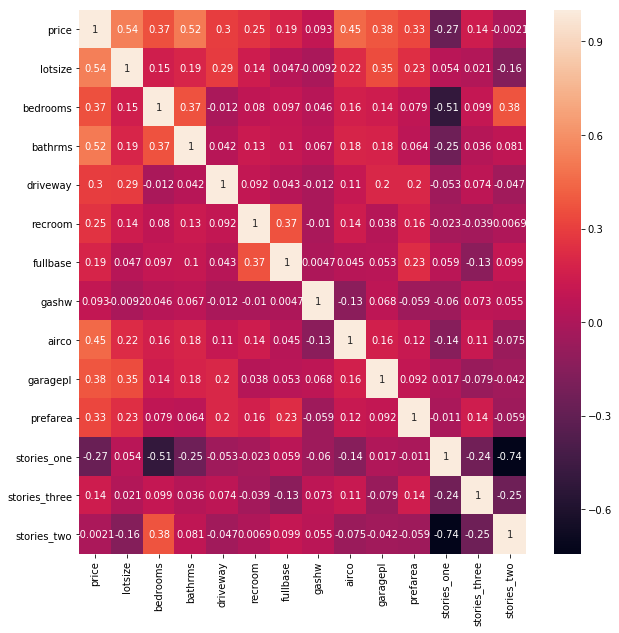

In [22]:
corr  = dataset.corr()
print(corr)
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [23]:
import statsmodels.api as sm


C:\Users\srikanth\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


**Step-3: Converting Dataframes into array**

X = dataset[0].values # independent variable

y = dataset[1].values # independent variable

In [24]:
X = dataset.iloc[:,1:-1].values # independent variable
y = dataset.iloc[:,0].values # independent variable

**Step-4: if data is unstructued -> converting into structred**

In [27]:
# X = np.reshape(X,(len(X),1)) # reshaping
# y = np.reshape(y,(len(y),1)) # reshaping
# print('Shape of X ', X.shape)
# print('Shape of y ', y.shape)

## Splitting Data 80 % training set and 20 % testing set

In [28]:
from sklearn.cross_validation import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=1)

In [30]:
# create a fitted model
regressor = sm.OLS(y_train, X_train).fit()

In [33]:
# print the summary
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     761.5
Date:                Fri, 18 May 2018   Prob (F-statistic):          4.07e-278
Time:                        07:51:25   Log-Likelihood:                -4819.6
No. Observations:                 436   AIC:                             9663.
Df Residuals:                     424   BIC:                             9712.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.2814      0.414      7.932      0.0

In [35]:
# make predictions on the testing set
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

In [36]:
y_pred = regressor.predict(X) # full data


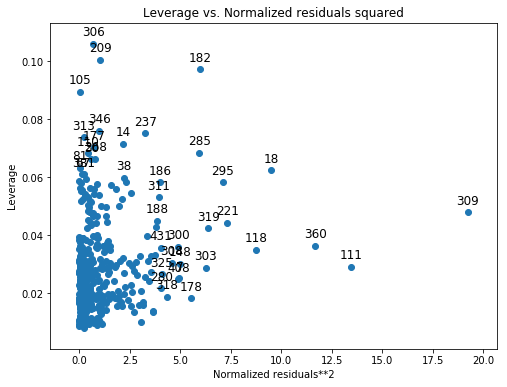

In [37]:
# lets plot the normalized residual vs leverage
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(regressor, ax = ax)

Plotting normalized residual vs leverage to understand the outlier points.

residual: difference between actual and predicted

leverage: is a measure of how far away the independent variable values of an observation are from those of the other observations

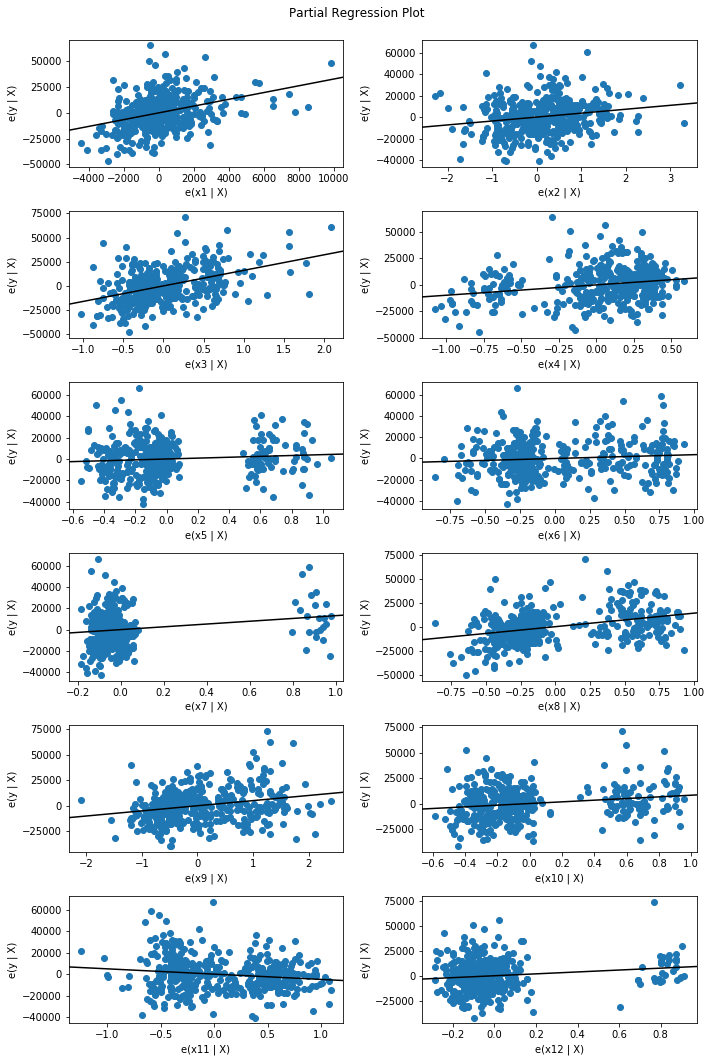

In [40]:
# linearity plots
fig = plt.figure(figsize=(10,15))
fig = sm.graphics.plot_partregress_grid(regressor, fig=fig)

# Great job !!!